In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 1
%aimport main

all_reviews_file = '../raw-data/yelp_academic_dataset_review.csv'

help(main)

Help on module main:

NAME
    main - Helper functions for Yelp dataset challenge

FUNCTIONS
    convert_data_file(json_file_name, output, max_files=50000000000000002382364672)
        Converts the provided json files to sepparate CSV files in the output folder, call it with:
        convert_data_file('../raw-data/yelp_academic_dataset_review.json', '../raw-data/reviews/file-')
        and it will all files into the reviews folder: reviews/file-1.csv, reviews/file-2.csv, etc
    
    create_single_csv(json_file_name, output, exclude=[], max_lines=False)
        converts the entered JSON file into a single CSV, excluding the rows whose indexes appear in exclude
        max - is the maximum number of lines to be processed
    
    load_json_lines(fname)
        Yields the JSON data in fname, which should have one JSON object per line

FILE
    /home/ariel/work/yelp/yelp-dataset-challenge/ariel-notebook/main.py




Convert the JSON file into a CSV file. This operation only needs to be executed once

In [2]:
%%time
main.create_single_csv('../raw-data/yelp_academic_dataset_review.json', all_reviews_file)

CPU times: user 2min 38s, sys: 3.58 s, total: 2min 42s
Wall time: 2min 51s


In [3]:
# error parsing csv https://github.com/pandas-dev/pandas/issues/5500
import dask.dataframe as dd
df = dd.read_csv(all_reviews_file, blocksize=int(25e6))  # 25MB chunks  
df.head()

,date,useful,cool,stars,text,type,business_id,funny,user_id,review_id
0,2011-10-10,0,0,5,If you enjoy service by someone who is as comp...,review,2aFiy99vNLklCx3T_tGS9A,0.0,KpkOkG6RIf4Ra25Lhhxf1A,NxL8SIC5yqOdnlXCg18IBg
1,2010-12-29,1,0,5,After being on the phone with Verizon Wireless...,review,2aFiy99vNLklCx3T_tGS9A,0.0,bQ7fQq1otn9hKX-gXRsrgA,pXbbIgOXvLuTi_SPs1hQEQ
2,2011-04-29,0,0,5,Great service Corey is very service oriented. ...,review,2aFiy99vNLklCx3T_tGS9A,0.0,r1NUhdNmL6yU9Bn-Yx6FTw,wslW2Lu4NYylb1jEapAGsw
3,2014-07-14,0,1,5,Highly recommended. Went in yesterday looking ...,review,2LfIuF3_sX6uwe-IR-P0jQ,0.0,aW3ix1KNZAvoM8q-WghA3Q,GP6YEearUWrzPtQYSF1vVg
4,2014-01-15,0,0,4,I walked in here looking for a specific piece ...,review,2LfIuF3_sX6uwe-IR-P0jQ,0.0,YOo-Cip8HqvKp_p9nEGphw,25RlYGq2s5qShi-pn3ufVA


CPU times: user 31.8 s, sys: 2.44 s, total: 34.3 s
Wall time: 24.1 s


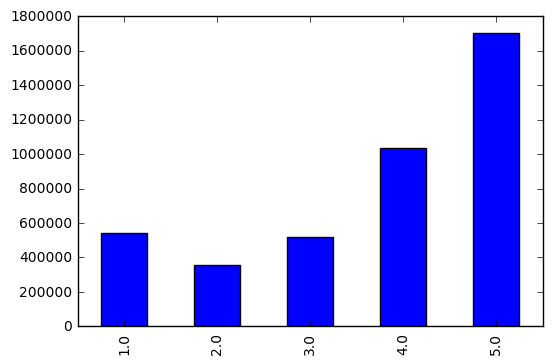

In [7]:
%%time
df.stars.value_counts().compute().sort_index().plot(kind='bar')

In [9]:
df.user_id.value_counts().head()

CxDOIDnH8gp9KXzpBHJYXw    3327
bLbSNkLggFnqwNNzzq-Ijw    1795
PKEzKWv_FktMm2mGPjwd0Q    1509
QJI9OSEn6ujRCtrX06vs1w    1316
DK57YibC5ShBmqQl97CKog    1266
Name: user_id, dtype: int64

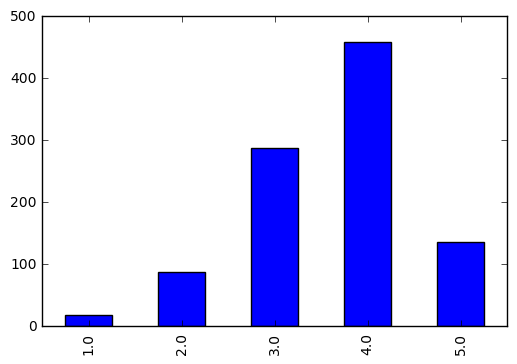

In [10]:
def plot_user_ratings(user_id): df[df.user_id == user_id].stars.value_counts().compute().sort_index().plot(kind='bar')
plot_user_ratings('hWDybu_KvYLSdEFzGrniTw')

In [4]:
df.business_id.value_counts().head()

4JNXUYY8wbaaDmk3BPzlWw    6414
RESDUcs7fIiihp38-d6_6g    5715
K7lWdNUhCbcnEvI0NhGewg    5216
cYwJA2A6I12KNkm2rtXd5g    5116
DkYS3arLOhA8si5uUEmHOw    4655
Name: business_id, dtype: int64

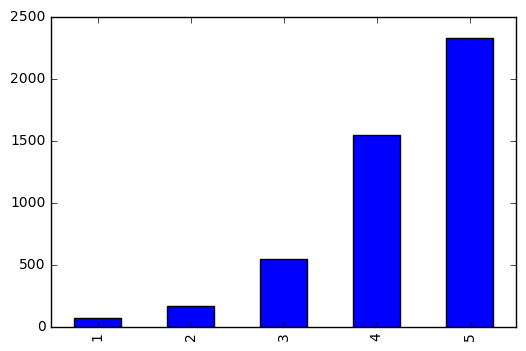

In [6]:
def plot_business_ratings(business_id): df[df.business_id == business_id].stars.value_counts().compute().sort_index().plot(kind='bar')
plot_business_ratings('DkYS3arLOhA8si5uUEmHOw')